In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chadwambles/supermarket-sales")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████| 36.5k/36.5k [00:00<00:00, 656kB/s]

Extracting files...
Path to dataset files: C:\Users\Daniel\.cache\kagglehub\datasets\chadwambles\supermarket-sales\versions\4


In [2]:
import pandas as pd

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


In [3]:
df = pd.read_csv(r"A:\repo\HSE\dwh\datasets\sales.csv")

In [4]:
df

,sale_id,branch,city,customer_type,gender,product_name,product_category,unit_price,quantity,tax,total_price,reward_points
0,1,A,New York,Member,Male,Shampoo,Personal Care,5.50,3,1.16,17.66,1
1,2,B,Los Angeles,Normal,Female,Notebook,Stationery,2.75,10,1.93,29.43,0
2,3,A,New York,Member,Female,Apple,Fruits,1.20,15,1.26,19.26,1
3,4,A,Chicago,Normal,Male,Detergent,Household,7.80,5,2.73,41.73,0
4,5,B,Los Angeles,Member,Female,Orange Juice,Beverages,3.50,7,1.72,26.22,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,A,New York,Member,Female,Shampoo,Stationery,1.55,11,1.19,18.24,1
996,997,A,New York,Member,Male,Detergent,Personal Care,2.44,7,1.20,18.28,1
997,998,A,New York,Member,Female,Shampoo,Stationery,17.92,2,2.51,38.35,3
998,999,A,New York,Member,Female,Shampoo,Beverages,17.41,4,4.87,74.51,7


In [5]:
dtypes_df = df.dtypes.reset_index()
object_cols = dtypes_df[dtypes_df[0] == 'object']['index'].tolist()
non_object_cols = dtypes_df[dtypes_df[0] != 'object']['index'].tolist()

## Count / Count distinct

In [6]:
df.nunique()

sale_id             1000
branch                 2
city                   3
customer_type          2
gender                 2
product_name           5
product_category       5
unit_price           787
quantity              20
tax                  755
total_price          956
reward_points         43
dtype: int64

In [7]:
df.count()

sale_id             1000
branch              1000
city                1000
customer_type       1000
gender              1000
product_name        1000
product_category    1000
unit_price          1000
quantity            1000
tax                 1000
total_price         1000
reward_points       1000
dtype: int64

## Count null / not null


In [8]:
df.isna().sum()

sale_id             0
branch              0
city                0
customer_type       0
gender              0
product_name        0
product_category    0
unit_price          0
quantity            0
tax                 0
total_price         0
reward_points       0
dtype: int64

In [9]:
(~df.isna()).sum()

sale_id             1000
branch              1000
city                1000
customer_type       1000
gender              1000
product_name        1000
product_category    1000
unit_price          1000
quantity            1000
tax                 1000
total_price         1000
reward_points       1000
dtype: int64

## Length Max/Min/Avg

In [10]:
sdf = pd.Series()
for obj_col in object_cols:
    sdf[obj_col] = df[obj_col].str.len().max()
sdf.name = 'max'
sdf

branch               1
city                11
customer_type        6
gender               6
product_name        12
product_category    13
Name: max, dtype: int64

In [11]:
sdf = pd.Series()
for obj_col in object_cols:
    sdf[obj_col] = df[obj_col].str.len().min()
sdf.name = 'min'
sdf

branch              1
city                7
customer_type       6
gender              4
product_name        5
product_category    6
Name: min, dtype: int64

In [12]:
sdf = pd.Series()
for obj_col in object_cols:
    sdf[obj_col] = df[obj_col].str.len().mean()
sdf.name = 'mean'
sdf

branch              1.000
city                8.648
customer_type       6.000
gender              4.944
product_name        8.242
product_category    9.403
Name: mean, dtype: float64

## Max/Min/Avg/Median/Mean/Percentile

In [13]:
df[non_object_cols].describe()

,sale_id,unit_price,quantity,tax,total_price,reward_points
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.836110,10.337000,7.758010,118.583900,6.057000
std,288.819436,5.775924,6.029908,6.538066,99.936441,9.350464
min,1.000000,1.020000,1.000000,0.080000,1.210000,0.000000
25%,250.750000,5.867500,5.000000,2.510000,38.380000,0.000000
50%,500.500000,10.615000,10.000000,5.870000,89.705000,0.000000
75%,750.250000,15.882500,16.000000,11.522500,176.072500,10.000000
max,1000.000000,20.980000,20.000000,28.390000,433.990000,43.000000


## PSI (population stability index)
Раньше нигде не использовал, но т.к. ML уже давно не занимаюсь(около 5-6 лет), выветрилось)  
Может когда закончу DE(я middle DE в ВТБ и ИСИЭЗ НИУ ВШЭ) начну снова вспоминать, к тому же ML инженерия тоже интересно)  
в этой тетрадке это единственное, что мне пришлось гуглить и юзать LLM :)  

In [14]:
import pandas as pd
import numpy as np

def calculate_psi(reference_series, monitored_series, num_bins=10):
    """
    Calculates the Population Stability Index (PSI) between two pandas Series.

    Args:
        reference_series (pd.Series): The reference population data.
        monitored_series (pd.Series): The monitored population data.
        num_bins (int): The number of bins to use for numerical data.

    Returns:
        float: The calculated PSI value.
    """
    if pd.api.types.is_numeric_dtype(reference_series):
        all_data = pd.concat([reference_series, monitored_series])
        bins = pd.cut(all_data, bins=num_bins, retbins=True, duplicates='drop')[1]
    else: # Categorical data
        bins = reference_series.unique()
        
    # Calculate counts in each bin
    ref_counts = pd.cut(reference_series, bins=bins, right=True, include_lowest=True).value_counts().sort_index()
    mon_counts = pd.cut(monitored_series, bins=bins, right=True, include_lowest=True).value_counts().sort_index()

    # Calculate proportions
    ref_prop = ref_counts / ref_counts.sum()
    mon_prop = mon_counts / mon_counts.sum()

    # Handle zero proportions to avoid log(0) and division by zero
    epsilon = 1e-6
    ref_prop = ref_prop.apply(lambda x: max(x, epsilon))
    mon_prop = mon_prop.apply(lambda x: max(x, epsilon))

    # Calculate PSI
    psi_values = (mon_prop - ref_prop) * np.log(mon_prop / ref_prop)
    total_psi = psi_values.sum()

    return total_psi

# Example Usage:
# data_ref = pd.Series(np.random.normal(loc=0, scale=1, size=1000))
# data_mon = pd.Series(np.random.normal(loc=0.5, scale=1.2, size=1000))
# psi_score = calculate_psi(data_ref, data_mon)
# print(f"PSI Score: {psi_score}")

In [19]:
psi_score = calculate_psi(df['total_price'].iloc[:-50], df['total_price'].iloc[-50:])
print(f"PSI Score: {psi_score}") 

PSI Score: 0.6165249481753239


## Stddev


In [21]:
df[non_object_cols].std()

sale_id          288.819436
unit_price         5.775924
quantity           6.029908
tax                6.538066
total_price       99.936441
reward_points      9.350464
dtype: float64

## Corr Matrix

In [22]:
df[non_object_cols].corr()

,sale_id,unit_price,quantity,tax,total_price,reward_points
sale_id,1.000000,-0.024420,0.026755,0.000225,0.000225,0.009196
unit_price,-0.024420,1.000000,-0.034115,0.602459,0.602462,0.361565
quantity,0.026755,-0.034115,1.000000,0.684281,0.684288,0.398320
tax,0.000225,0.602459,0.684281,1.000000,1.000000,0.591436
total_price,0.000225,0.602462,0.684288,1.000000,1.000000,0.591441
reward_points,0.009196,0.361565,0.398320,0.591436,0.591441,1.000000


<Axes: >

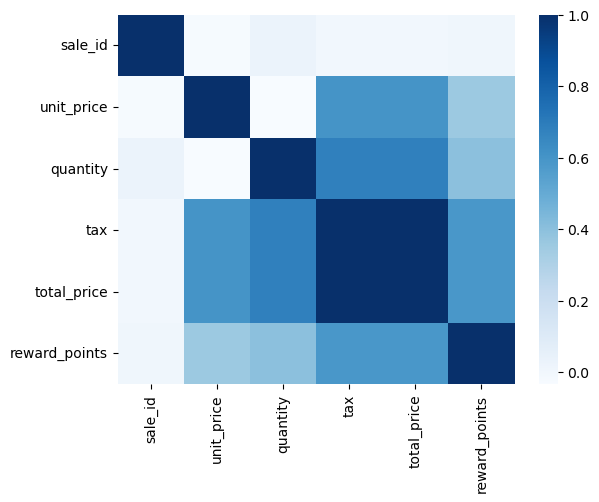

In [25]:
import seaborn as sns
sns.heatmap(df[non_object_cols].corr(),  cmap='Blues')

из тепловой карты видно что **total_price** и **tax** имеют 100% корреляцию, матрица вырожденная

## 	topX values


Т.к. местами у некоторых полей нету множества значений я возьму топ 5

In [37]:
for obj_col in object_cols:
    print(f'COLUMN \"{obj_col}\" TOP 5:')
    print(df[obj_col].value_counts().reset_index()[:5])
    print('-'*10)

COLUMN "branch" TOP 5:
  branch  count
0      A    674
1      B    326
----------
COLUMN "city" TOP 5:
          city  count
0     New York    344
1      Chicago    330
2  Los Angeles    326
----------
COLUMN "customer_type" TOP 5:
  customer_type  count
0        Member    516
1        Normal    484
----------
COLUMN "gender" TOP 5:
   gender  count
0    Male    528
1  Female    472
----------
COLUMN "product_name" TOP 5:
   product_name  count
0       Shampoo    224
1  Orange Juice    208
2      Notebook    194
3     Detergent    189
4         Apple    185
----------
COLUMN "product_category" TOP 5:
  product_category  count
0           Fruits    209
1    Personal Care    208
2       Stationery    198
3        Household    198
4        Beverages    187
----------


In [43]:
df[non_object_cols].nlargest(5, columns=non_object_cols).reset_index().drop('index', axis=1)

,sale_id,unit_price,quantity,tax,total_price,reward_points
0,1000,4.11,4,1.15,17.59,0
1,999,17.41,4,4.87,74.51,7
2,998,17.92,2,2.51,38.35,3
3,997,2.44,7,1.20,18.28,1
4,996,1.55,11,1.19,18.24,1


In [49]:
for non_obj_col in non_object_cols:
    print(f'COLUMN \"{non_obj_col}\" TOP 5:')
    print(df[non_obj_col].nlargest(5))
    print('-'*10)

COLUMN "sale_id" TOP 5:
999    1000
998     999
997     998
996     997
995     996
Name: sale_id, dtype: int64
----------
COLUMN "unit_price" TOP 5:
880    20.98
500    20.96
984    20.96
902    20.92
160    20.91
Name: unit_price, dtype: float64
----------
COLUMN "quantity" TOP 5:
8     20
47    20
57    20
58    20
72    20
Name: quantity, dtype: int64
----------
COLUMN "tax" TOP 5:
957    28.39
57     27.94
160    27.81
621    27.68
760    27.58
Name: tax, dtype: float64
----------
COLUMN "total_price" TOP 5:
957    433.99
57     427.14
160    425.10
621    423.08
760    421.64
Name: total_price, dtype: float64
----------
COLUMN "reward_points" TOP 5:
957    43
160    42
56     41
134    41
260    40
Name: reward_points, dtype: int64
----------


## Histogram

array([[<Axes: title={'center': 'sale_id'}>,
        <Axes: title={'center': 'unit_price'}>],
       [<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'tax'}>],
       [<Axes: title={'center': 'total_price'}>,
        <Axes: title={'center': 'reward_points'}>]], dtype=object)

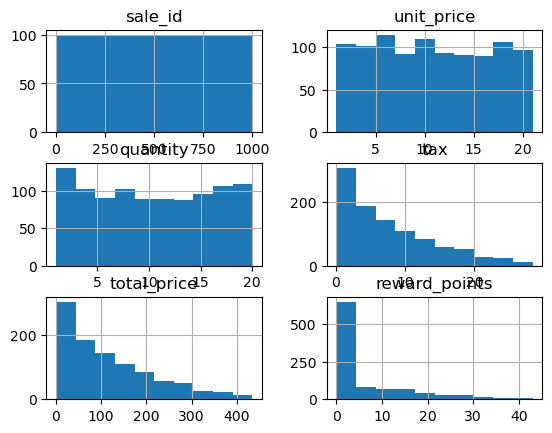

In [50]:
df.hist()

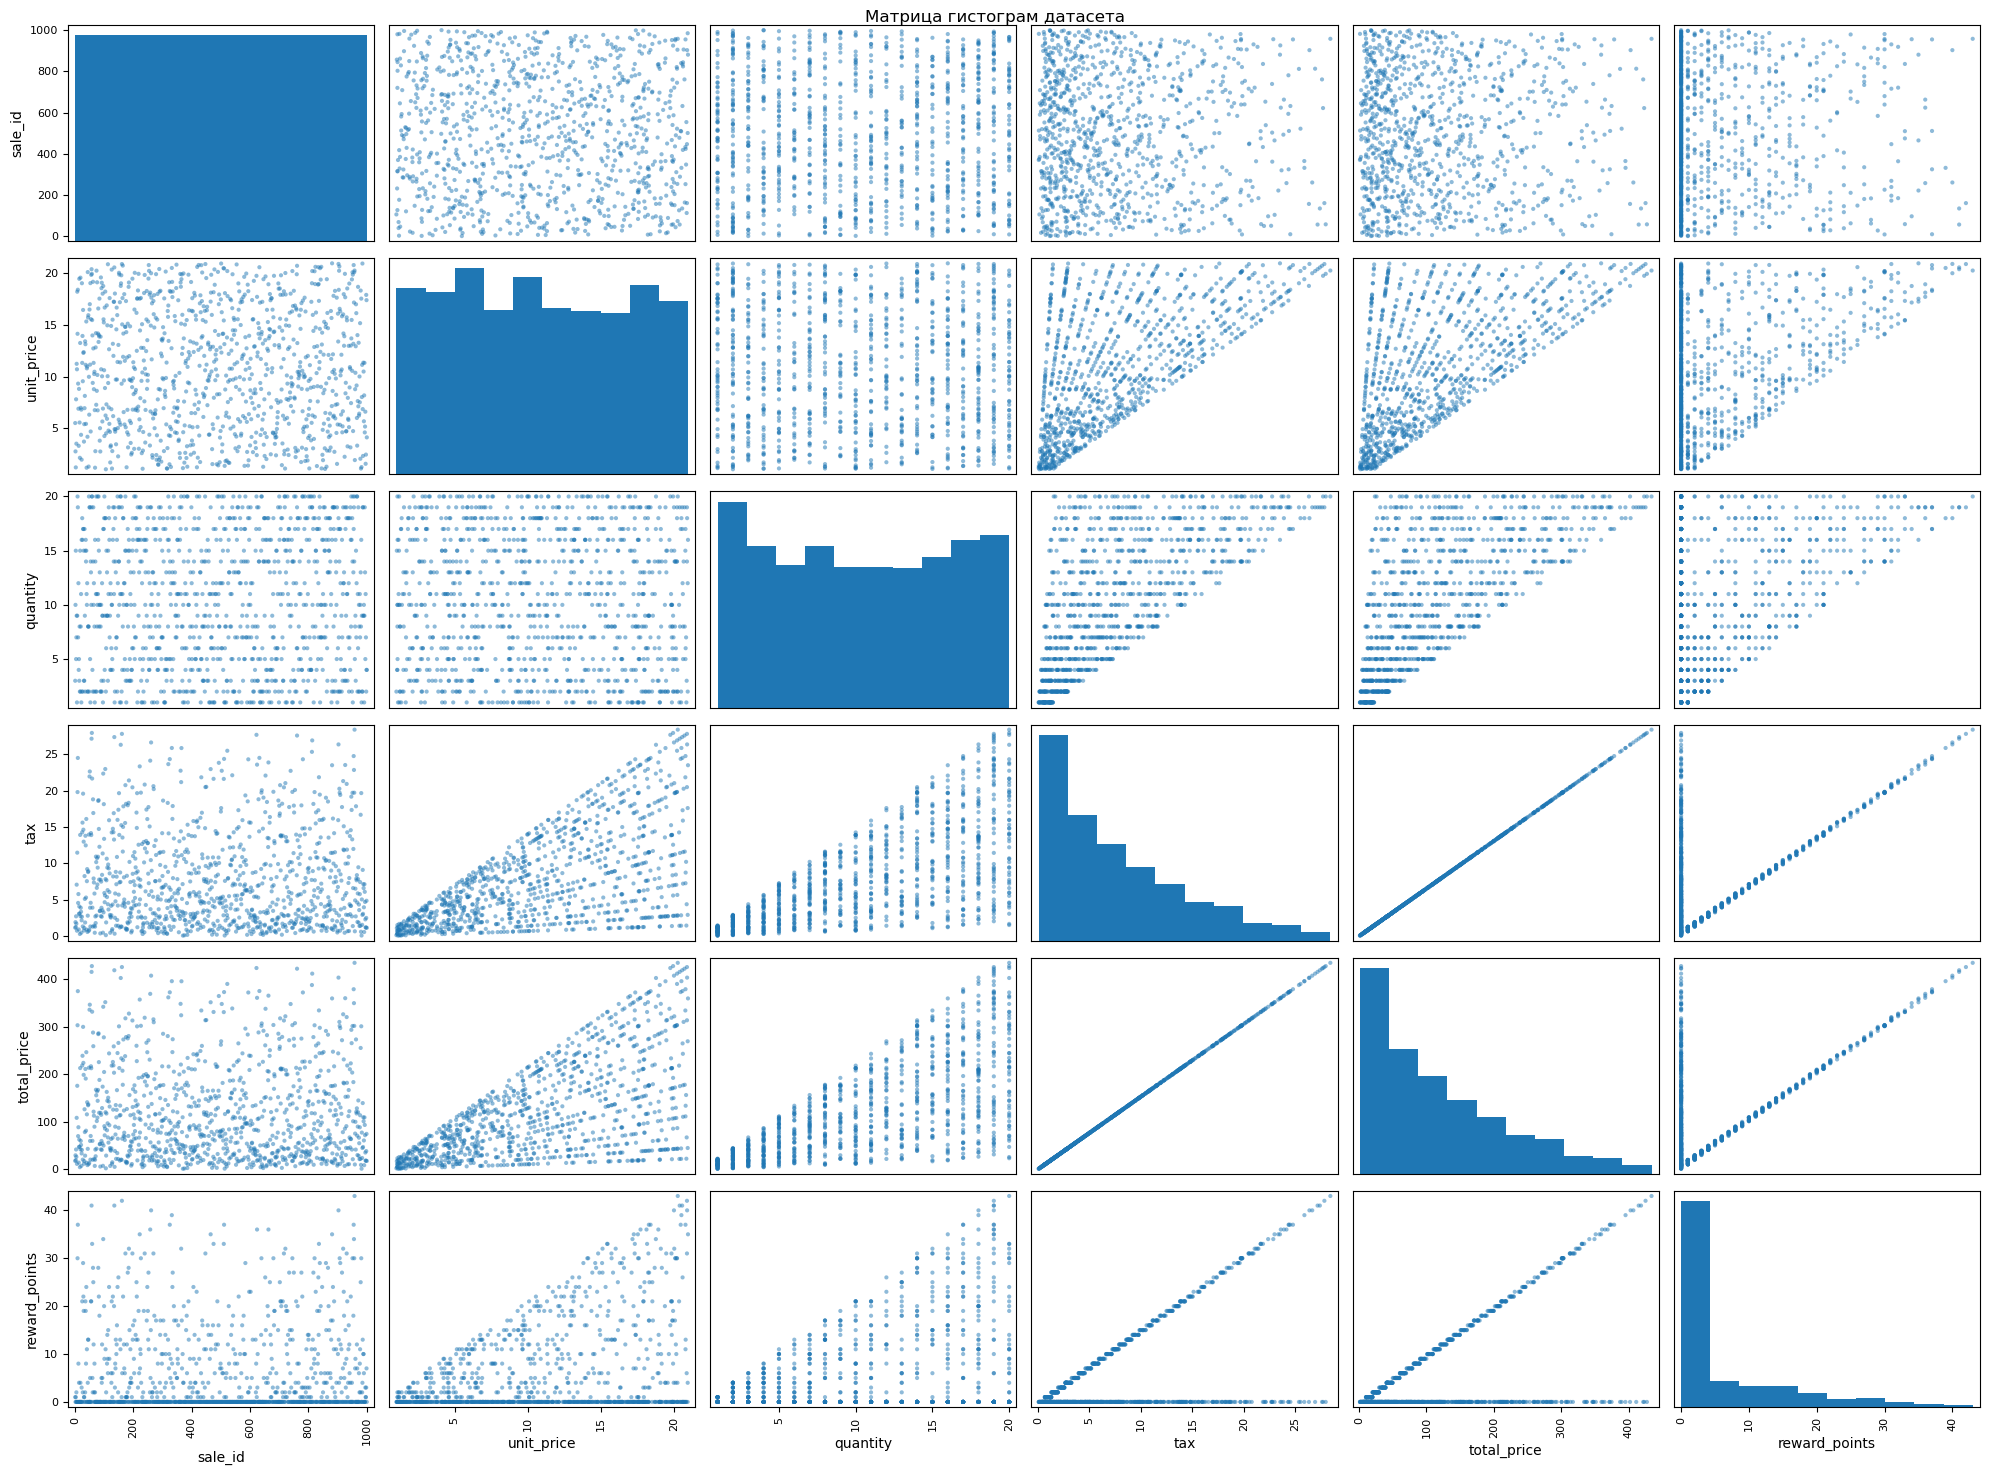

In [57]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df, figsize=(20, 15), diagonal='hist')
plt.suptitle('Матрица гистограм датасета')
plt.tight_layout()
plt.show()